<a href="https://colab.research.google.com/github/satijagunika/TelecomDomain/blob/main/TelecomDomain_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Title: **Telecom Customer Churn Prediction Using Machine Learning**

### Project Overview:
This project aims to predict customer churn in the telecom industry using machine learning techniques. Customer churn refers to the phenomenon where customers stop using a company's services. By accurately predicting churn, telecom companies can take proactive measures to retain their customers and reduce revenue losses.

### Data:
The project uses a telecom customer dataset that includes various features like customer demographics, account information, services subscribed, and usage patterns. The dataset is typically split into training and testing sets for model development and evaluation.

### Objective:
The primary objective of the project is to build a machine learning model that can predict whether a customer is likely to churn based on the available data. The model will help telecom companies identify at-risk customers and take preventive actions.

### Methodology:
1. **Data Preprocessing**:
   - Handling missing values
   - Encoding categorical variables
   - Feature scaling and normalization

2. **Exploratory Data Analysis (EDA)**:
   - Visualizing the distribution of key features
   - Identifying correlations between variables
   - Analyzing the characteristics of churned vs. non-churned customers

3. **Model Selection**:
   - Comparing different machine learning algorithms such as Logistic Regression, Decision Trees, Random Forest, and XGBoost.
   - Evaluating models based on accuracy, precision, recall, F1-score, and AUC-ROC curve.

4. **Model Training**:
   - Training the selected model on the training dataset
   - Tuning hyperparameters to improve performance

5. **Model Evaluation**:
   - Testing the model on the unseen test dataset
   - Analyzing the model's performance and making adjustments as needed

### Challenges:
- Dealing with imbalanced data where the number of churned customers is much smaller than non-churned customers.
- Selecting the right features that have the most predictive power.
- Ensuring the model generalizes well to new, unseen data.

### Conclusion:
This project demonstrates the application of machine learning in solving real-world business problems in the telecom industry. By predicting customer churn, telecom companies can improve customer retention strategies and reduce revenue losses.

---


`##Importing essential libraries for data analysis, visualization, and configure settings to improve readability and suppress unnecessary warnings.`


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

`# Loaded the telecom customer dataset from the drive and displayed the first few records for an initial overview.`

In [7]:
dataset = '/content/drive/MyDrive/Colab Notebooks/telecom domain/Telecom_Customer_Details.csv'
data = pd.read_csv(dataset)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#Display the names of all columns in the dataset to understand its structure.
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [83]:
# Show the dimensions of the dataset (number of rows and columns) to understand its size.
data.shape

(7032, 20)

In [84]:
# Display a summary of the dataset including the number of non-null entries and data types for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

<Axes: >

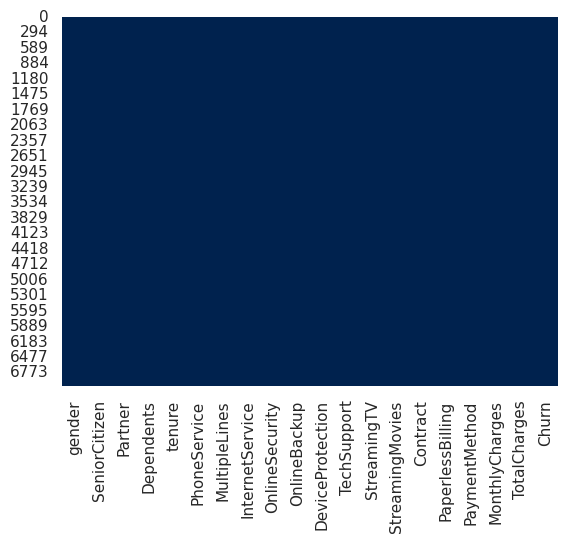

In [85]:
# Visualize missing values in the dataset using a heatmap to identify patterns of missing data.
sns.heatmap(data.isnull(),cmap='cividis',cbar = False)

In [86]:
# Print a summary of missing values per column and the total number of missing values in the dataset.
print("____________________________________")
print("Rows\t\tMissing Values")
print("-------------------------------------")
print(data.isnull().sum())
print("____________________________________")
print(data.isnull().sum().sum())

____________________________________
Rows		Missing Values
-------------------------------------
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
____________________________________
0


*`Conclusion`*: We dont have any null values in the dataset.

In [87]:
# Printing the data type of each column to understand the data structure.
print("____________________________________")
print("Rows\t\tData Type")
print("------------------------------------")
print(data.dtypes)
print("____________________________________")

____________________________________
Rows		Data Type
------------------------------------
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
____________________________________


*`Conclusion`*: Majority of data set item is in *`OBJECT`* type.



In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


In [88]:
# Count the number of occurrences of each unique value in the 'TotalCharges' column.
data.TotalCharges.value_counts()

,count
TotalCharges,
20.20,11
19.75,9
20.05,8
19.90,8
19.65,8
...,...
6849.40,1
692.35,1
130.15,1


In [89]:
# Replace empty strings in the 'TotalCharges' column with NaN to handle missing values.
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)

In [90]:
# Calculate the percentage of missing values in the 'TotalCharges' column.
data['TotalCharges'].isnull().sum()/len(data)*100

0.0

In [91]:
# Count the number of occurrences of each unique value in the 'TotalCharges' column after replacing empty strings with NaN.
data.TotalCharges.value_counts()

,count
TotalCharges,
20.20,11
19.75,9
20.05,8
19.90,8
19.65,8
...,...
6849.40,1
692.35,1
130.15,1


In [92]:
# Filter out rows with NaN values in the 'TotalCharges' column and display the first few records of the cleaned dataset.
data = data[data['TotalCharges'].notnull()]
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
data.shape

(7032, 21)

In [24]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [93]:
# Convert the 'TotalCharges' column to float data type for numerical analysis.
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [95]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [98]:
# Apply Label Encoding to categorical features in `df1` and print the transformation details.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep=True)

text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    df1[i] = le.fit_transform(df1[i])
    print(i, ' : ', df1[i].unique(), ' = ', le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [99]:
# Count the occurrences of each unique value in the 'gender' column after label encoding.

df1['gender'].value_counts()

,count
gender,
1,3549
0,3483


In [31]:
# Count the occurrences of each unique value in the 'Partner' column after label encoding.
df1['Partner'].value_counts()

,count
Partner,
0,3639
1,3393


In [100]:
# List the names of numerical columns based on summary statistics.
data.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [33]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7032.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Partner,7032.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Dependents,7032.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
tenure,7032.00,32.42,24.55,1.00,9.00,29.00,55.00,72.00
PhoneService,7032.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
MultipleLines,7032.00,0.94,0.95,0.00,0.00,1.00,2.00,2.00
InternetService,7032.00,0.87,0.74,0.00,0.00,1.00,1.00,2.00
OnlineSecurity,7032.00,0.79,0.86,0.00,0.00,1.00,2.00,2.00
OnlineBackup,7032.00,0.91,0.88,0.00,0.00,1.00,2.00,2.00


In [101]:
# Count the occurrences of each unique value in the 'Churn' column to understand class distribution after encoding.
df1['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


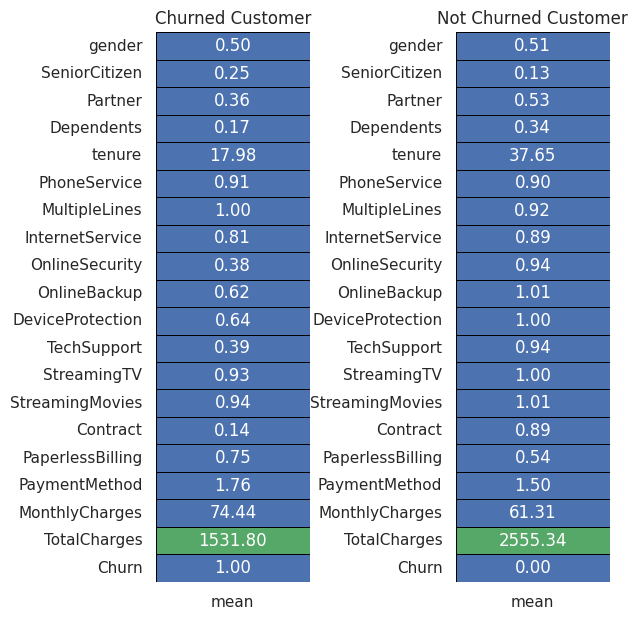

In [102]:
colors = ['#4C72B0', '#55A868']

churn = df1[df1['Churn']==1].describe().T
not_churn = df1[df1['Churn']==0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')

plt.title('Churned Customer')

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')
plt.title('Not Churned Customer')

fig.tight_layout(pad=0)

##*Exploratory Data Analysis(EDA)*
`The process of analyzing and visualizing datasets to uncover patterns, trends, relationships, and anomalies`

In [36]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30
std,0.37,24.55,30.09,2266.77
min,0.00,1.00,18.25,18.80
25%,0.00,9.00,35.59,401.45
50%,0.00,29.00,70.35,1397.47
75%,0.00,55.00,89.86,3794.74
max,1.00,72.00,118.75,8684.80


In [38]:
# Count the number of unique values in the 'TotalCharges' column to assess its variability.
data['TotalCharges'].nunique()

6530

In [103]:
# Classify columns into categorical or numerical features based on the number of unique values and print the lists.
col = list(df1.columns)
categorical_features = []
numerical_features = []

for i in col:
    if len(data[i].unique()) >6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('categorical_features :', *categorical_features)
print()
print("numerical_features :", *numerical_features)

categorical_features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn

numerical_features : tenure MonthlyCharges TotalCharges


In [104]:
# List all column names in the DataFrame to review its structure.
list(df1.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [41]:
df1.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


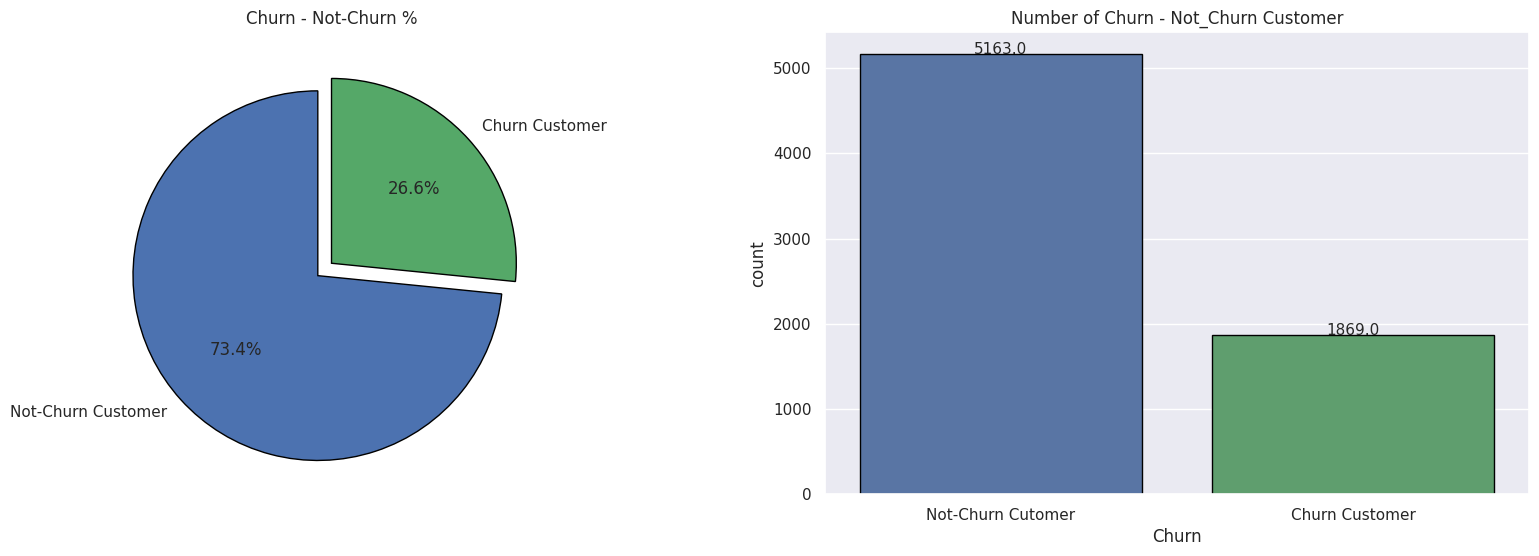

In [105]:
# Create a pie chart and a count plot to visualize the distribution of churn vs. non-churn customers.
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
plt.subplot(1,2,1)
plt.pie(circle, labels = ['Not-Churn Customer', 'Churn Customer'], autopct = '%1.1f%%', startangle=90,
        explode = (0.1,0), colors = colors, wedgeprops  = {'edgecolor' : 'black',
                                                           'linewidth':1, 'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)

ax = sns.countplot(x='Churn', data = data, palette = colors, edgecolor = 'black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment = 'center', fontsize=11)
ax.set_xticklabels(['Not-Churn Cutomer', 'Churn Customer'])

plt.title('Number of Churn - Not_Churn Customer');
plt.show()

In [43]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Gender, SeniorCitizen, Partner, Dependents

##Case 1 : Customer information
##Case 2 : Payment information
##Case 3 : Service Subscribed

In [46]:
categorical_features
# numerical_features = []

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [47]:
# Removing Churn variable as it's target
categorical_features.remove('Churn')

In [48]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [49]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [106]:
# Case 1 : Customer information
# Case 2 : Payment information
# Case 3 : Service Subscribed

In [108]:
# Case 1 : Customer information
l1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
# Case 2 : Payment information
l2 = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
      'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']
# Case 3 : Service Subscribed
l3 = ['Contract',  'PaperlessBilling',  'PaymentMethod']

# Case 1 : Customer information


In [109]:

l1

['gender', 'SeniorCitizen', 'Partner', 'Dependents']

In [53]:
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


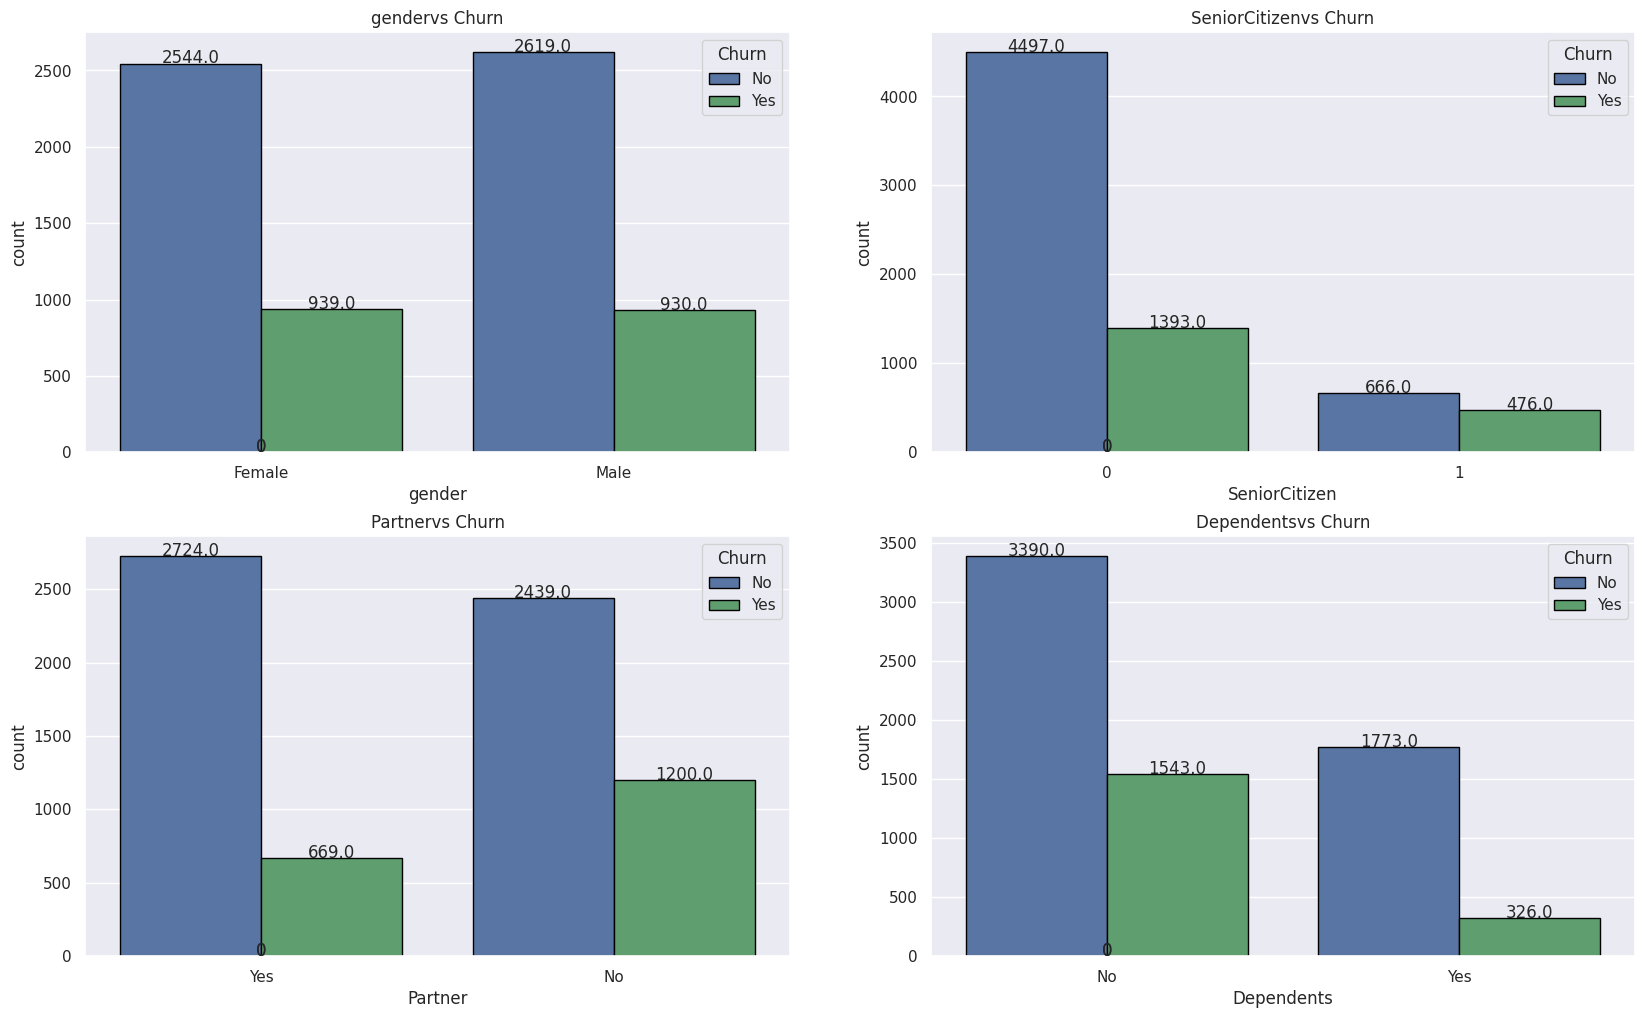

In [110]:
# Create a grid of count plots for each feature in `l1`, comparing distributions by 'Churn', with annotations and a title for each plot.
fig  = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i], data=data, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l1[i] + 'vs Churn'
        plt.title(title);

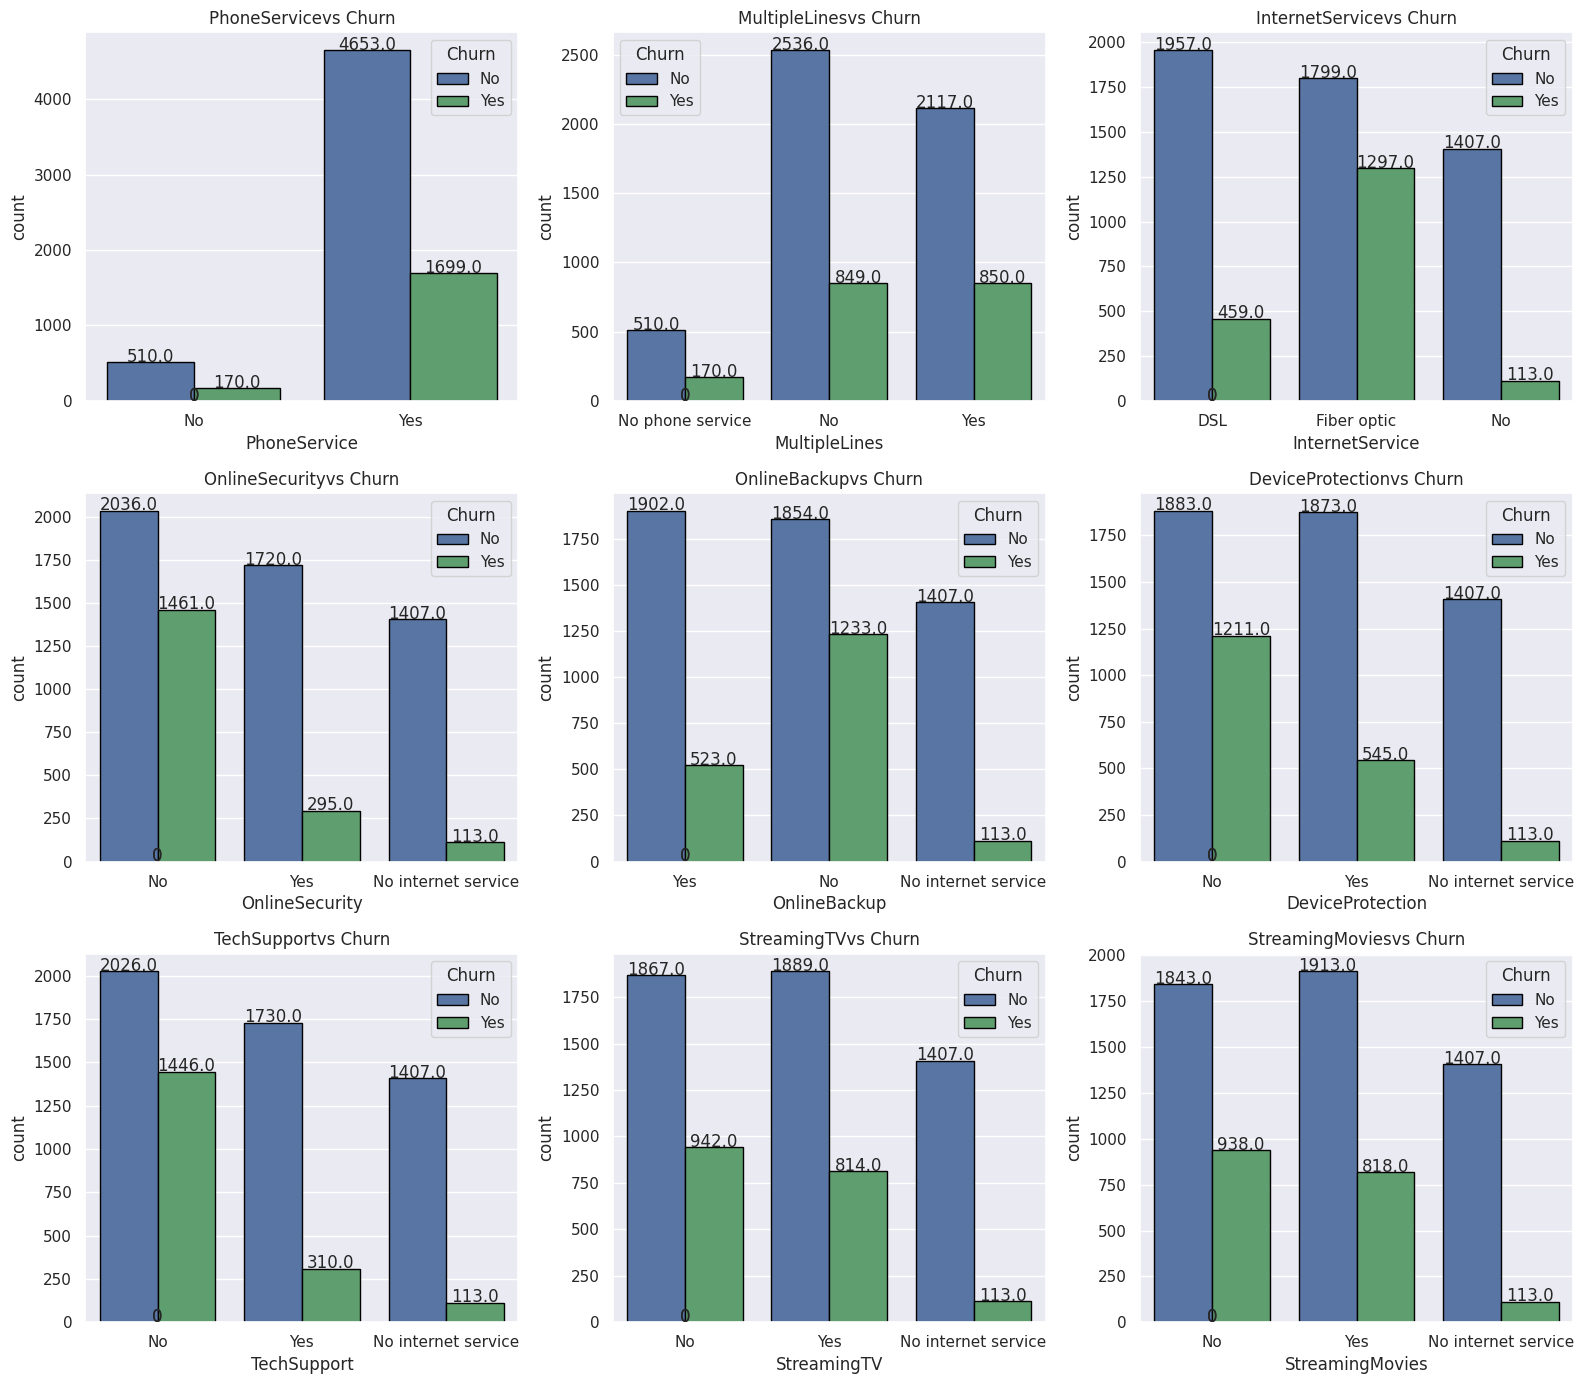

In [111]:
# Generate a 3x3 grid of count plots for each feature in `l2`, visualizing the distribution of each feature by 'Churn'. Each plot is annotated with counts and has a title indicating the feature compared to 'Churn'.

fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l2)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=l2[i], data=data, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l2[i] + 'vs Churn'
        plt.title(title)
        plt.tight_layout();

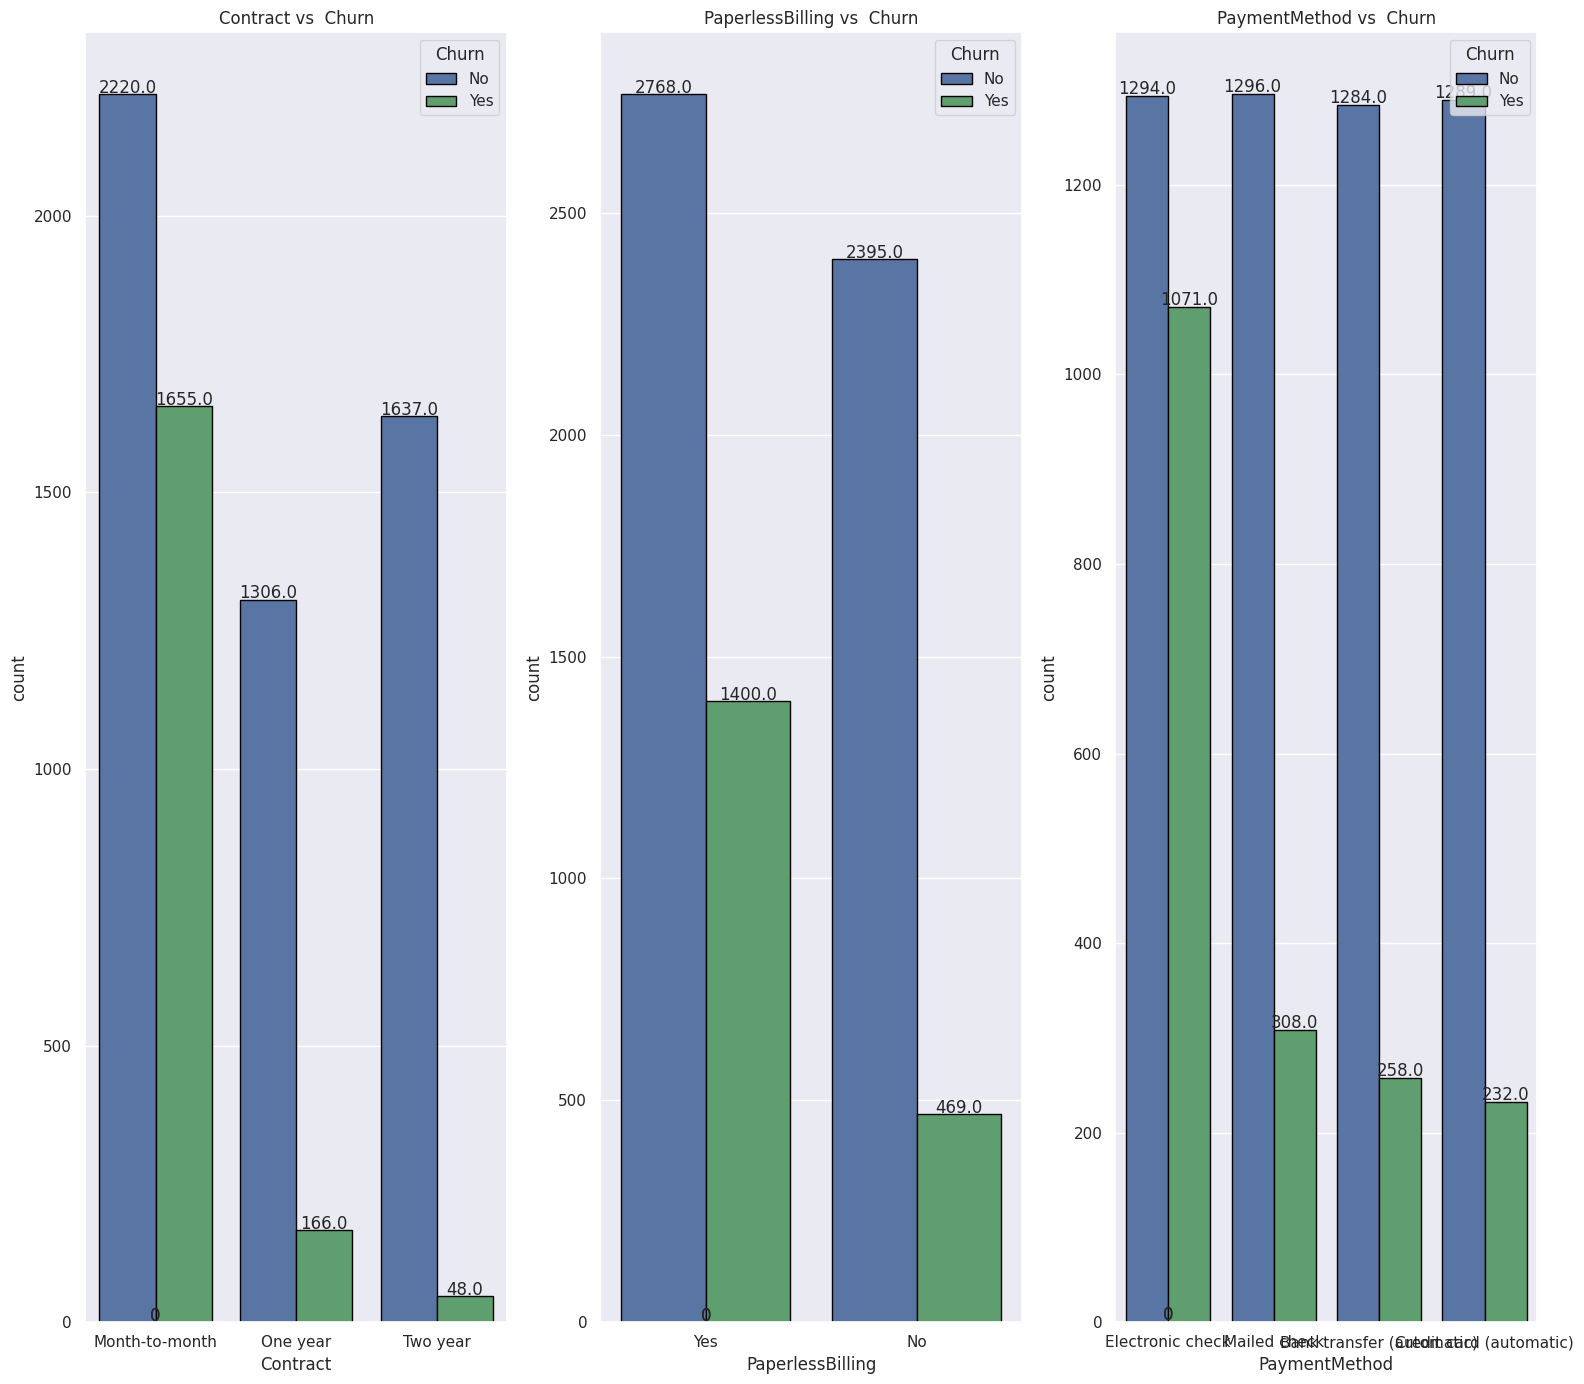

In [112]:
# Create a 1x3 grid of count plots for the first three features in `l3`, visualizing the distribution of each feature by 'Churn'. Each plot is annotated with counts and has a title indicating the feature compared to 'Churn'.
fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l3[0:3])):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=l3[i], data=data, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l3[i] + ' vs  Churn'
        plt.title(title)
        plt.tight_layout();

In [113]:
# Count the occurrences of each unique value in the 'PhoneService' column to understand its distribution.
data['PhoneService'].value_counts()

,count
PhoneService,
Yes,6352
No,680


In [114]:
# Print the list of numerical features identified in the dataset.
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

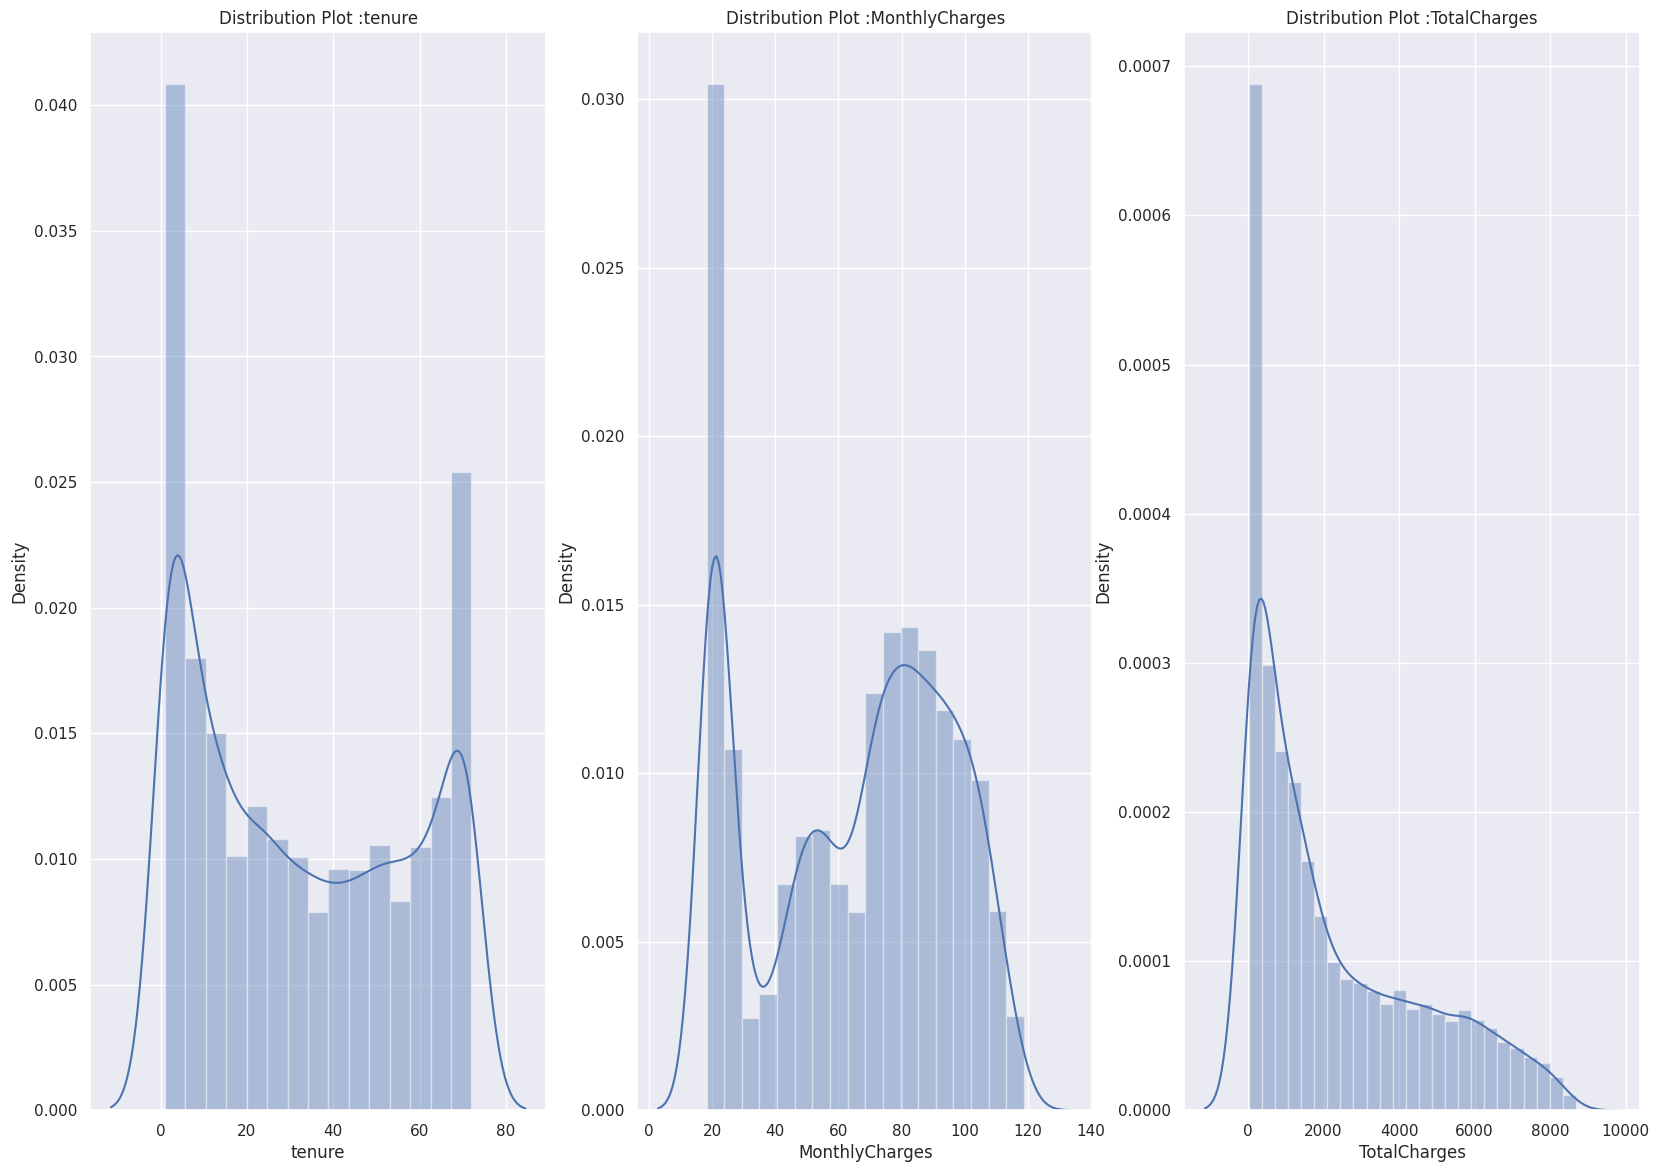

In [115]:
# Create a 1x3 grid of distribution plots for each numerical feature in `numerical_features`, visualizing the data distribution using a specific color.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,14))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]], color= colors[0])
    title = 'Distribution Plot :' + numerical_features[i]
    plt.title(title)
plt.show()

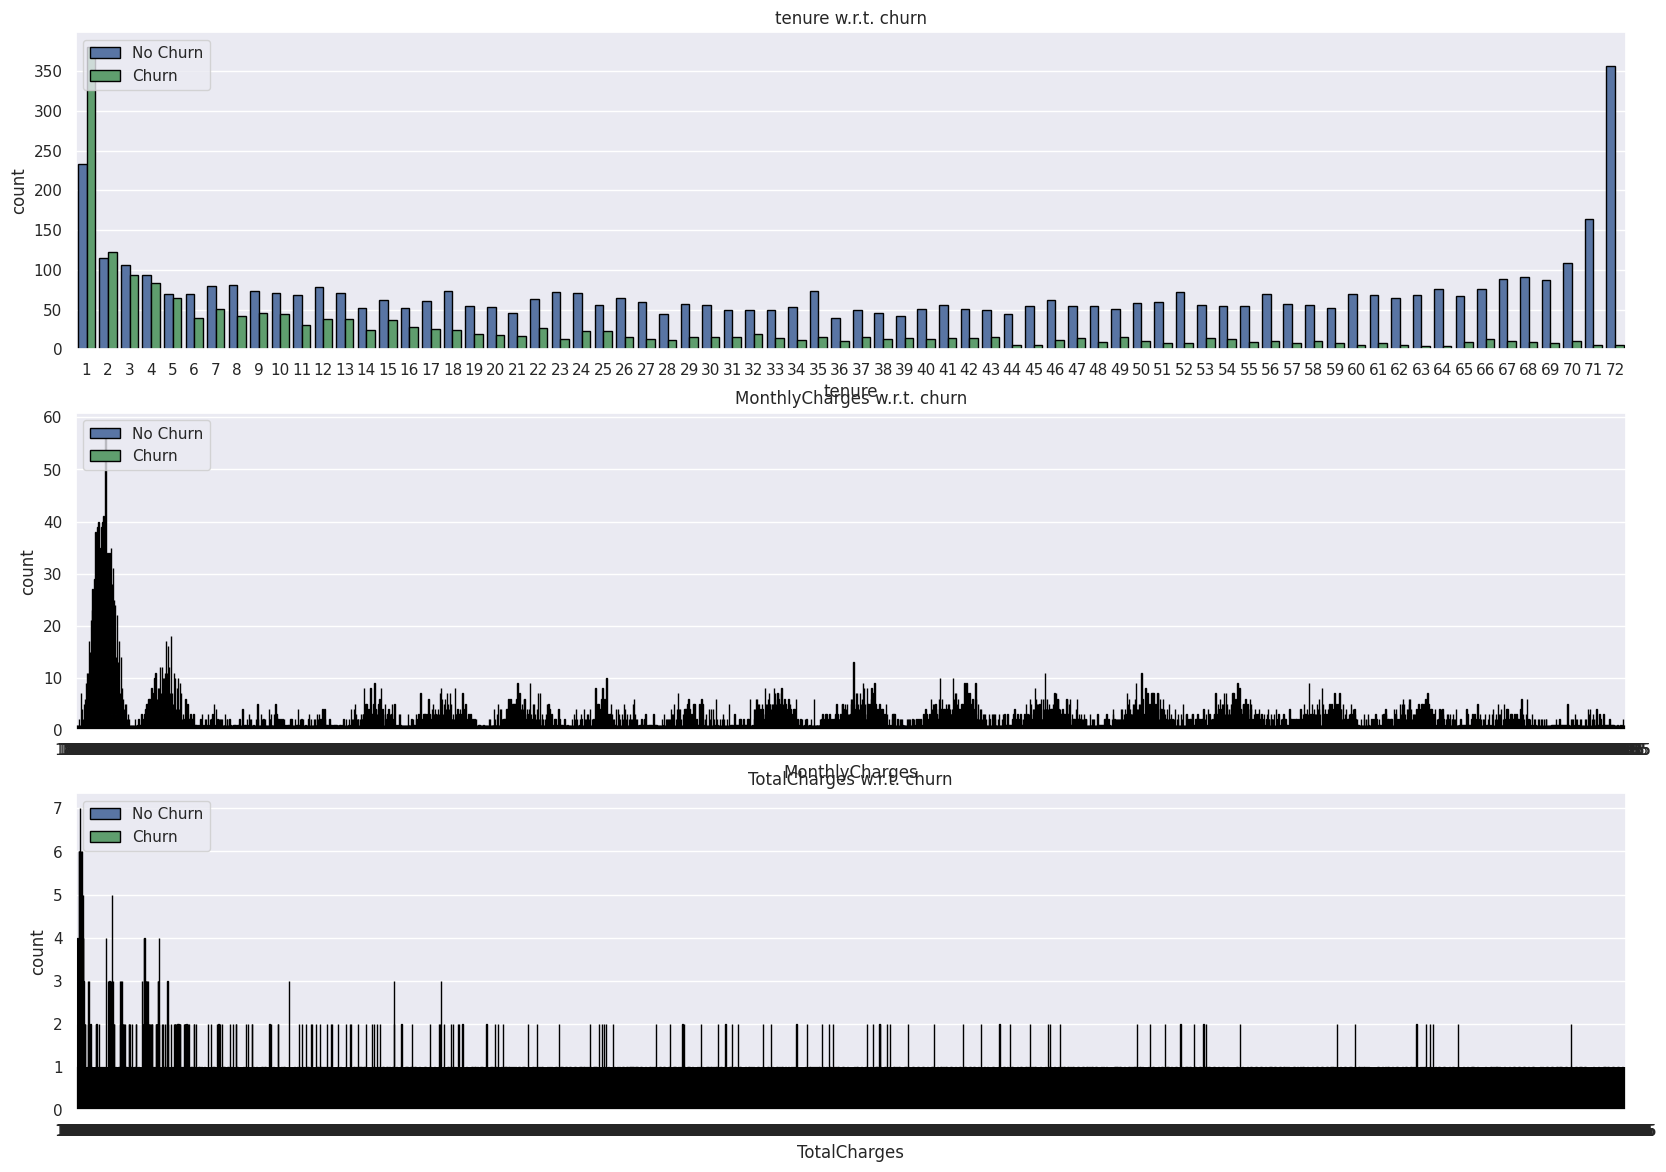

In [116]:
# Create a 3x1 grid of count plots for each numerical feature in `numerical_features`,
# showing the distribution of each feature with respect to 'Churn'. Each plot includes a legend and a title.
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,14))
for i in range(len(numerical_features)):
    plt.subplot(3,1, i+1)
    sns.countplot(x = numerical_features[i], data=data, hue='Churn',
    palette=colors, edgecolor='black')
    plt.legend(['No Churn', 'Churn'], loc='upper left')
    title = numerical_features[i] + ' w.r.t. churn'
    plt.title(title)
plt.show()

# Import Plotly libraries for interactive visualizations:

`plotly.graph_objs` for creating various chart objects,

`plotly.express` for simple and quick plots, and

 `plotly.offline` for offline rendering.


In [61]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po

In [62]:
# Display the DataFrame `df1` to review its contents and structure after preprocessing.
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [117]:
# Calculate the average 'Churn' rate for each 'tenure' group, showing the proportion of churned customers over different tenures.
df1.groupby('tenure').Churn.mean()

,Churn
tenure,
1,0.62
2,0.52
3,0.47
4,0.47
5,0.48
...,...
68,0.09
69,0.08
70,0.09


In [118]:
# Aggregate the average 'Churn' rate for each 'tenure' group and
# reset the index to prepare the data for further analysis or visualization.
tenure_chunk = df1.groupby('tenure').Churn.mean().reset_index()

In [119]:
# Create an interactive scatter plot using Plotly to visualize the relationship between 'tenure' and 'Churn rate'.
# Each point represents the average churn rate for a given tenure, with a blue marker.
# The plot includes titles for the axes and a dark theme.
fig = go.Figure(data=[go.Scatter(x = tenure_chunk['tenure'],
                                 y = tenure_chunk['Churn'], mode = 'markers',
                                 name='Low', marker = dict(size=5,
                                                           line=dict(width=0.8),
                                                           color='blue'),)])

fig.update_layout(title = "Churn rate by Tenure", xaxis_title = "Tenure",
                  yaxis_title="Churn Rate", template = "plotly_dark")
fig.show()

In [66]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.50,0.16,0.48,0.30,32.42,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.98,0.99,0.69,0.59,1.57,64.80,2283.30,0.27
std,0.50,0.37,0.50,0.46,24.55,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2266.77,0.44
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.59,401.45,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1397.47,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.86,3794.74,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


In [67]:
# Apply standard scaling to the 'tenure', 'MonthlyCharges', and 'TotalCharges' columns to normalize their values,
# ensuring all features have a mean of 0 and standard deviation of 1 for consistent analysis.
# ['tenure', 'MonthlyCharges', 'TotalCharges']
# Feature scaling is required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1['tenure'] = scaler.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = scaler.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = scaler.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.28,0,1,0,0,2,0,0,0,0,0,1,2,-1.16,-0.99,0
1,1,0,0,0,0.06,1,0,0,2,0,2,0,0,0,1,0,3,-0.26,-0.17,0
2,1,0,0,0,-1.24,1,0,0,2,2,0,0,0,0,0,1,3,-0.36,-0.96,1
3,1,0,0,0,0.51,0,1,0,2,0,2,2,0,0,1,0,0,-0.75,-0.20,0
4,0,0,0,0,-1.24,1,0,1,0,0,0,0,0,0,0,1,2,0.20,-0.94,1


In [68]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.50,0.16,0.48,0.30,-0.00,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.98,0.99,0.69,0.59,1.57,0.00,-0.00,0.27
std,0.50,0.37,0.50,0.46,1.00,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,1.00,1.00,0.44
min,0.00,0.00,0.00,0.00,-1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.55,-1.00,0.00
25%,0.00,0.00,0.00,0.00,-0.95,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.97,-0.83,0.00
50%,1.00,0.00,0.00,0.00,-0.14,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,0.18,-0.39,0.00
75%,1.00,0.00,1.00,1.00,0.92,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,0.83,0.67,1.00
max,1.00,1.00,1.00,1.00,1.61,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.79,2.82,1.00


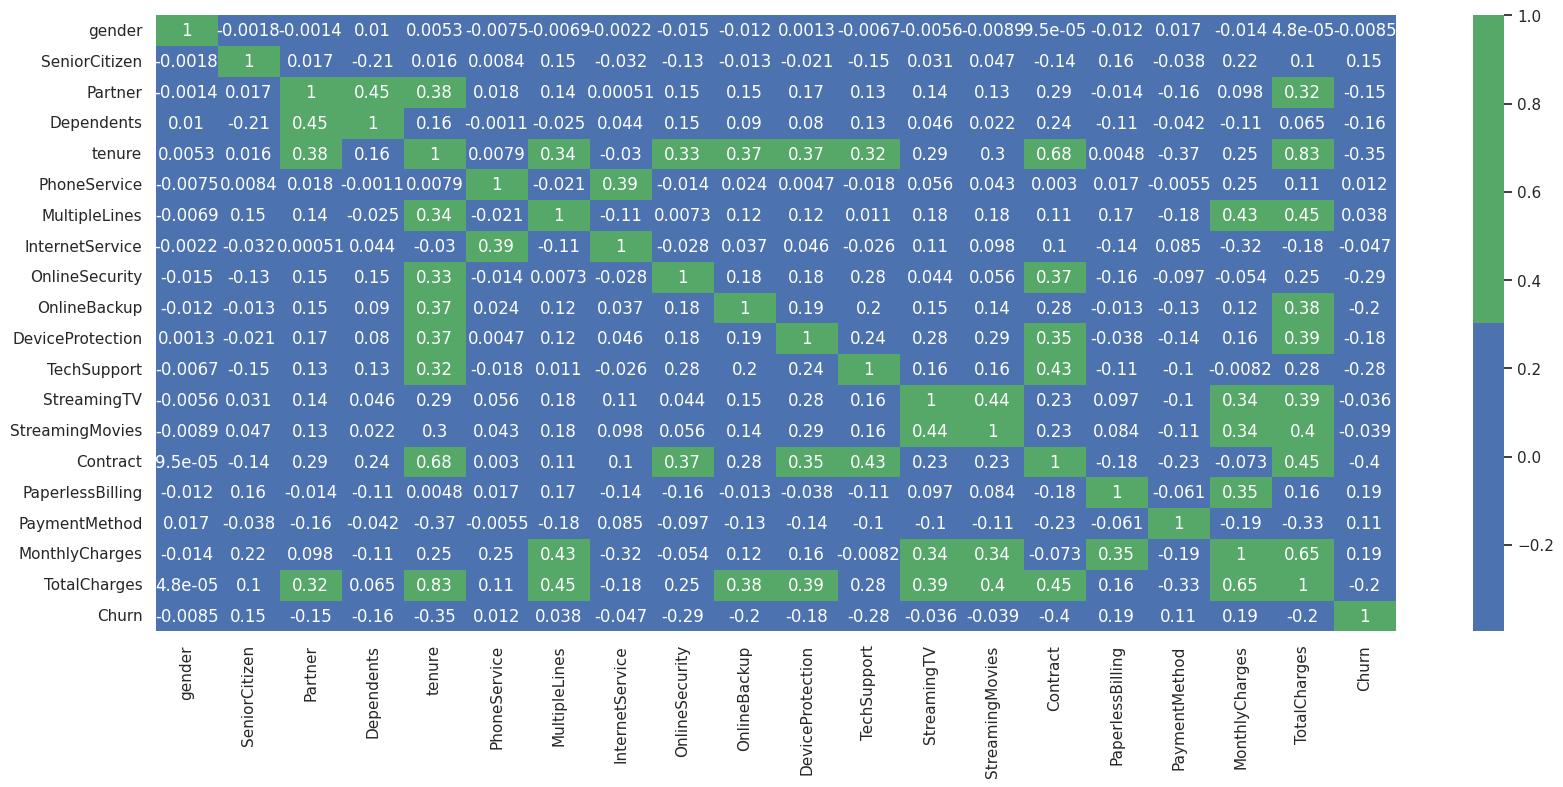

In [120]:
# Generate a heatmap of the correlation matrix for `df1`, visualizing the strength and direction of relationships
# between numerical features using the specified color scheme.

# Correlation part :

plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), cmap=colors, annot=True);

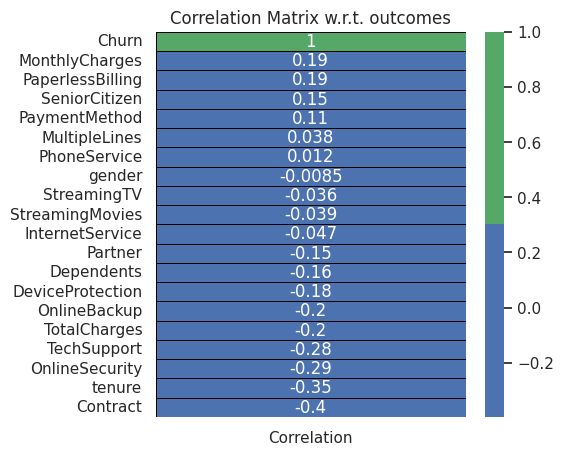

In [121]:
# Compute and visualize the correlation of each feature with 'Churn', displaying the results in a heatmap to
# identify which features have the strongest relationships with churn.
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()


##categorical_features - chi-square test
##numerical_features  - Anova test

In [122]:
# Import functions for feature selection: `SelectKBest` for selecting the top features, `chi2` for the Chi-Square test,
# and `mutual_info_classif` for mutual information classification.

# Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [73]:
df1.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.28,0,1,0,0,2,0,0,0,0,0,1,2,-1.16,-0.99,0


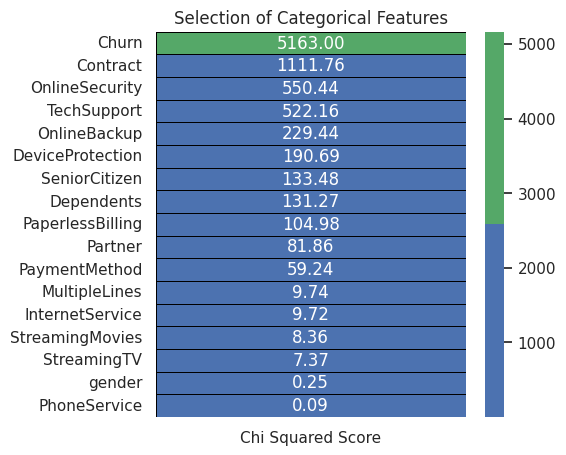

In [123]:
# Perform the Chi-Square test for feature selection on categorical features,
# evaluating their significance in predicting 'Churn'. Display the scores in a heatmap to highlight which features hav

# Chi-Square Test :
features = df1.loc[:,categorical_features] # char
target = df1.loc[:,'Churn'] # cat
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(categorical_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

In [75]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [124]:
# Anova Testing: Assess the significance of numerical features in relation to the categorical target variable 'Churn'.
# This involves checking whether the mean values of numerical features differ significantly across different 'Churn' classes.

# Anova Testing : numerical_features
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [77]:
# Import the `f_classif` function from `sklearn.feature_selection` to perform ANOVA (Analysis of Variance) for feature
# selection, which helps in assessing the significance of numerical features with respect to a categorical target variable.
from sklearn.feature_selection import f_classif

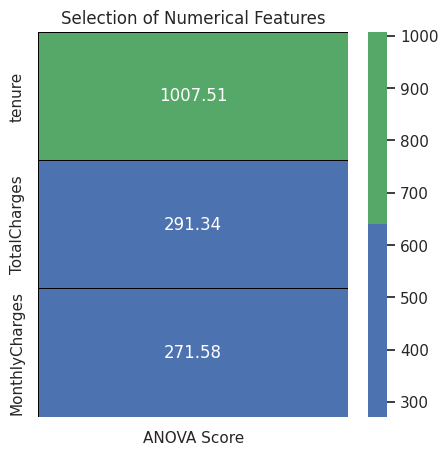

In [125]:
# Perform ANOVA (Analysis of Variance) testing to evaluate the significance of numerical features in predicting 'Churn'.
# Calculate and visualize ANOVA scores for each numerical feature using a heatmap to identify the most relevant features.

# Anova Testing

features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

In [128]:
print(df1.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [130]:
df1['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [129]:
df1['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.73
1,0.27
